# All Motifs SD Enrichment

/tmp/ipykernel_3518063/1973001338.py:48: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


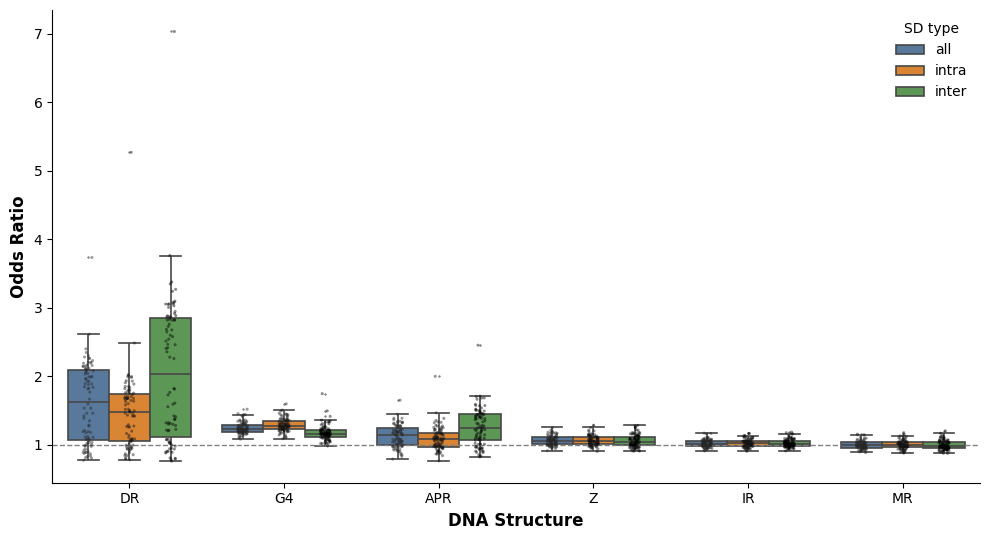

[saved] /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/overall_nonB_segdup_enrichment_GROUPED_bySD.pdf


In [4]:
#!/usr/bin/env python3
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ====== CONFIG ======
IN_CSV  = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/segdup_analysis/fixed_SDs/final_results_SegDup_FIXED.csv"  # <-- contains sd_type
OUT_PDF = "/home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/overall_nonB_segdup_enrichment_GROUPED_bySD.pdf"

ORDER_SDTYPE = ["all", "intra", "inter"]
HUE_PALETTE  = {"all": "#4C78A8", "intra": "#F58518", "inter": "#54A24B"}  # tweak if you like

# ====== LOAD ======
df = pd.read_csv(IN_CSV)

# keep only structures of interest (if your CSV has others)
wanted = {"G4", "MR", "DR", "IR", "APR", "Z"}
if "structure" not in df.columns or "odds_ratio" not in df.columns or "sd_type" not in df.columns:
    raise ValueError("CSV must have columns: structure, odds_ratio, sd_type")

df = df.dropna(subset=["structure", "odds_ratio", "sd_type"])
df = df[df["odds_ratio"] > 0]
df = df[df["structure"].isin(wanted)]

# ensure sd_type is within expected set and ordered
df = df[df["sd_type"].isin(ORDER_SDTYPE)].copy()
df["sd_type"] = pd.Categorical(df["sd_type"], categories=ORDER_SDTYPE, ordered=True)

# Order structures by overall median OR (across all sd_types)
median_order = (
    df.groupby("structure")["odds_ratio"]
      .median()
      .sort_values(ascending=False)
      .index.tolist()
)

# ====== PLOT ======
plt.figure(figsize=(10, 5.5))

ax = sns.boxplot(
    data=df, x="structure", y="odds_ratio",
    order=median_order, hue="sd_type",
    palette=HUE_PALETTE, fliersize=0.5, linewidth=1.2
)

# overplot points for visibility
sns.stripplot(
    data=df, x="structure", y="odds_ratio",
    order=median_order, hue="sd_type",
    dodge=True, color="black", size=2.2, alpha=0.45
)

# de-duplicate legend entries (box + strip both add handles)
handles, labels = ax.get_legend_handles_labels()
uniq = dict(zip(labels[:len(ORDER_SDTYPE)], handles[:len(ORDER_SDTYPE)]))
ax.legend(uniq.values(), uniq.keys(), title="SD type", frameon=False)

plt.axhline(1, color="gray", linestyle="--", linewidth=1)  # baseline OR=1
plt.xlabel("DNA Structure", fontsize=12, fontweight="bold")
plt.ylabel("Odds Ratio", fontsize=12, fontweight="bold")
# plt.title("Enrichment of Non-B DNA / G4 in Fixed Segmental Duplications by SD type", fontsize=13, fontweight="bold")
sns.despine()
plt.tight_layout()
os.makedirs(os.path.dirname(OUT_PDF), exist_ok=True)
plt.savefig(OUT_PDF, dpi=300)
plt.show()

print(f"[saved] {OUT_PDF}")

/tmp/ipykernel_1373284/3233358539.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["structure", "sd_type"])["odds_ratio"]



Median odds ratios per structure and SD type:
structure sd_type  odds_ratio
      APR   intra    1.076093
      APR   inter    1.244020
       DR   intra    1.481119
       DR   inter    2.038591
       G4   intra    1.269484
       G4   inter    1.160888
       IR   intra    1.018085
       IR   inter    1.011306
       MR   intra    0.997496
       MR   inter    0.979280
        Z   intra    1.048017
        Z   inter    1.038429


/tmp/ipykernel_1373284/3233358539.py:54: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


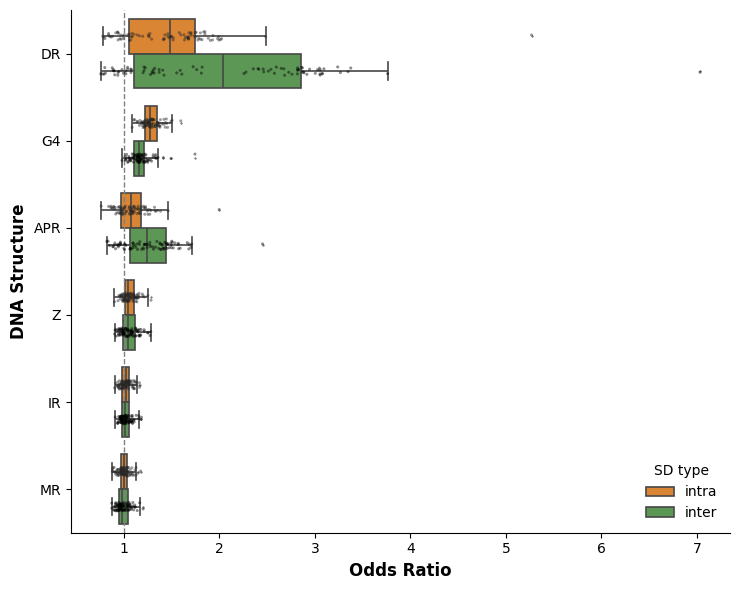

[saved] /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/overall_nonB_segdup_enrichment_GROUPED_bySD_flipped.pdf


In [2]:
#!/usr/bin/env python3
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ====== CONFIG ======
IN_CSV  = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/segdup_analysis/fixed_SDs/final_results_SegDup_FIXED.csv"
OUT_PDF = "/home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/overall_nonB_segdup_enrichment_GROUPED_bySD_flipped.pdf"

ORDER_SDTYPE = ["intra", "inter"]
HUE_PALETTE  = {"intra": "#F58518", "inter": "#54A24B"}

# ====== LOAD ======
df = pd.read_csv(IN_CSV)

wanted = {"G4", "MR", "DR", "IR", "APR", "Z"}
if "structure" not in df.columns or "odds_ratio" not in df.columns or "sd_type" not in df.columns:
    raise ValueError("CSV must have columns: structure, odds_ratio, sd_type")

df = df.dropna(subset=["structure", "odds_ratio", "sd_type"])
df = df[df["odds_ratio"] > 0]
df = df[df["structure"].isin(wanted)]

df = df[df["sd_type"].isin(ORDER_SDTYPE)].copy()
df["sd_type"] = pd.Categorical(df["sd_type"], categories=ORDER_SDTYPE, ordered=True)

median_order = (
    df.groupby("structure")["odds_ratio"]
      .median()
      .sort_values(ascending=False)
      .index.tolist()
)

# ====== CALCULATE MEDIANS ======
median_df = (
    df.groupby(["structure", "sd_type"])["odds_ratio"]
      .median()
      .reset_index()
)

print("\nMedian odds ratios per structure and SD type:")
print(median_df.to_string(index=False))

# ====== PLOT (flipped axes) ======
plt.figure(figsize=(7.5, 6))

ax = sns.boxplot(
    data=df, y="structure", x="odds_ratio",
    order=median_order, hue="sd_type",
    palette=HUE_PALETTE, fliersize=0.5, linewidth=1.2
)

sns.stripplot(
    data=df, y="structure", x="odds_ratio",
    order=median_order, hue="sd_type",
    dodge=True, color="black", size=2.2, alpha=0.45
)

# fix legend duplication
handles, labels = ax.get_legend_handles_labels()
uniq = dict(zip(labels[:len(ORDER_SDTYPE)], handles[:len(ORDER_SDTYPE)]))
ax.legend(uniq.values(), uniq.keys(), title="SD type", frameon=False)

plt.axvline(1, color="gray", linestyle="--", linewidth=1)  # baseline OR=1 now vertical
plt.ylabel("DNA Structure", fontsize=12, fontweight="bold")
plt.xlabel("Odds Ratio", fontsize=12, fontweight="bold")
sns.despine()
plt.tight_layout()
os.makedirs(os.path.dirname(OUT_PDF), exist_ok=True)
plt.savefig(OUT_PDF, dpi=300, bbox_inches='tight')
plt.show()

print(f"[saved] {OUT_PDF}")

/tmp/ipykernel_3699712/4234888350.py:55: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_outliers = df.groupby("structure", group_keys=False).apply(remove_outliers)
/tmp/ipykernel_3699712/4234888350.py:64: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


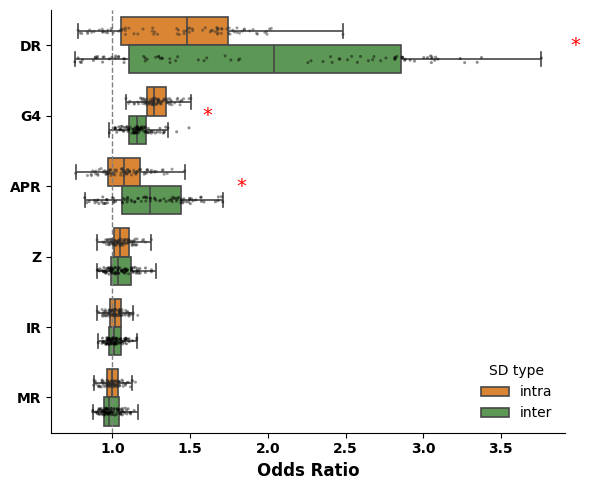

[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/overall_nonB_segdup_enrichment_GROUPED_bySD_flipped_sig.pdf


In [34]:
#!/usr/bin/env python3
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# ====== CONFIG ======
IN_CSV  = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/segdup_analysis/fixed_SDs/final_results_SegDup_FIXED.csv"
OUT_PDF = "/home/alextu/projects/def-sushant/alextu/imgs_no_titles2/overall_nonB_segdup_enrichment_GROUPED_bySD_flipped_sig.pdf"

ORDER_SDTYPE = ["intra", "inter"]
HUE_PALETTE  = {"intra": "#F58518", "inter": "#54A24B"}

# ====== LOAD ======
df = pd.read_csv(IN_CSV)
wanted = {"G4", "MR", "DR", "IR", "APR", "Z"}

if not {"structure", "odds_ratio", "sd_type"} <= set(df.columns):
    raise ValueError("CSV must have columns: structure, odds_ratio, sd_type")

df = df.dropna(subset=["structure", "odds_ratio", "sd_type"])
df = df[(df["odds_ratio"] > 0) & df["structure"].isin(wanted)]
df = df[df["sd_type"].isin(ORDER_SDTYPE)].copy()
df["sd_type"] = pd.Categorical(df["sd_type"], categories=ORDER_SDTYPE, ordered=True)

median_order = (
    df.groupby("structure")["odds_ratio"]
      .median()
      .sort_values(ascending=False)
      .index.tolist()
)

# ====== SIGNIFICANCE TESTS ======
pvals = {}
for struct in median_order:
    sub = df[df["structure"] == struct]
    intra = sub.loc[sub["sd_type"] == "intra", "odds_ratio"]
    inter = sub.loc[sub["sd_type"] == "inter", "odds_ratio"]
    if len(intra) > 2 and len(inter) > 2:
        stat, p = mannwhitneyu(intra, inter, alternative="two-sided")
        pvals[struct] = p
    else:
        pvals[struct] = None


def remove_outliers(group):
    q1 = group["odds_ratio"].quantile(0.25)
    q3 = group["odds_ratio"].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return group[(group["odds_ratio"] >= lower) & (group["odds_ratio"] <= upper)]

df_no_outliers = df.groupby("structure", group_keys=False).apply(remove_outliers)

# ====== PLOT ======
plt.figure(figsize=(6, 5))
ax = sns.boxplot(
    data=df, y="structure", x="odds_ratio",
    order=median_order, hue="sd_type",
    palette=HUE_PALETTE, showfliers=False, linewidth=1.2
)
sns.stripplot(
    data=df_no_outliers, y="structure", x="odds_ratio",
    order=median_order, hue="sd_type",
    dodge=True, color="black", size=2.2, alpha=0.45
)

# --- Fix legend duplication ---
handles, labels = ax.get_legend_handles_labels()
uniq = dict(zip(labels[:len(ORDER_SDTYPE)], handles[:len(ORDER_SDTYPE)]))
ax.legend(uniq.values(), uniq.keys(), title="SD type", frameon=False)

# --- Add significance stars ---
for i, struct in enumerate(median_order):
    p = pvals.get(struct)
    if p is not None and p < 0.05:
        y_pos = i   # position along y-axis (category index)
        x_max = df_no_outliers[df_no_outliers["structure"] == struct]["odds_ratio"].max()
        ax.text(x_max * 1.05, y_pos, "*", color="red", fontsize=14, va="center")

# --- Labels and layout ---
plt.axvline(1, color="gray", linestyle="--", linewidth=1)
plt.ylabel("", fontsize=12, fontweight="bold")
plt.xlabel("Odds Ratio", fontsize=12, fontweight="bold")
# Bold tick labels
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')

for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
sns.despine()
plt.tight_layout()
os.makedirs(os.path.dirname(OUT_PDF), exist_ok=True)
plt.savefig(OUT_PDF, dpi=300, bbox_inches="tight")
plt.show()

print(f"[saved] {OUT_PDF}")

/tmp/ipykernel_4110521/739925381.py:59: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_outliers = df.groupby("structure", group_keys=False).apply(remove_outliers)
/tmp/ipykernel_4110521/739925381.py:68: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


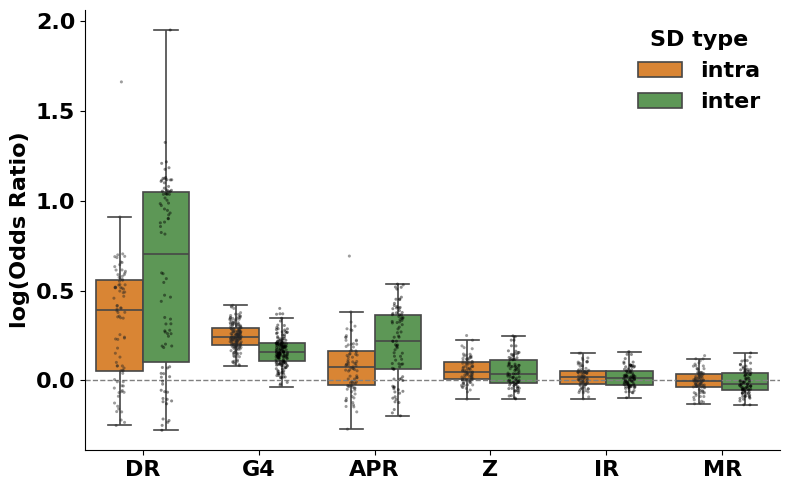

[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/overall_nonB_segdup_enrichment_GROUPED_bySD_flipped_sig.pdf


In [10]:
#!/usr/bin/env python3
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import numpy as np  # NEW

# ====== CONFIG ======
IN_CSV  = "/home/alextu/scratch/confidence_intervals_fixed_segdups_results/final_results_SegDup_FIXED_CI.csv"
OUT_PDF = "/home/alextu/projects/def-sushant/alextu/imgs_no_titles2/overall_nonB_segdup_enrichment_GROUPED_bySD_flipped_sig.pdf"

ORDER_SDTYPE = ["intra", "inter"]
HUE_PALETTE  = {"intra": "#F58518", "inter": "#54A24B"}

# ====== LOAD ======
df = pd.read_csv(IN_CSV)
wanted = {"G4", "MR", "DR", "IR", "APR", "Z"}

if not {"structure", "odds_ratio", "sd_type"} <= set(df.columns):
    raise ValueError("CSV must have columns: structure, odds_ratio, sd_type")

df = df.dropna(subset=["structure", "odds_ratio", "sd_type"])
df = df[(df["odds_ratio"] > 0) & df["structure"].isin(wanted)]
df = df[df["sd_type"].isin(ORDER_SDTYPE)].copy()
df["sd_type"] = pd.Categorical(df["sd_type"], categories=ORDER_SDTYPE, ordered=True)

# log(OR)
df["log_or"] = np.log(df["odds_ratio"])

median_order = (
    df.groupby("structure")["log_or"]   # USe log OR
      .median()
      .sort_values(ascending=False)
      .index.tolist()
)

# ====== SIGNIFICANCE TESTS ======
pvals = {}
for struct in median_order:
    sub = df[df["structure"] == struct]
    intra = sub.loc[sub["sd_type"] == "intra", "log_or"]   # CHANGED
    inter = sub.loc[sub["sd_type"] == "inter", "log_or"]   # CHANGED
    if len(intra) > 2 and len(inter) > 2:
        stat, p = mannwhitneyu(intra, inter, alternative="two-sided")
        pvals[struct] = p
    else:
        pvals[struct] = None


def remove_outliers(group):
    q1 = group["log_or"].quantile(0.25)   # CHANGED
    q3 = group["log_or"].quantile(0.75)   # CHANGED
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return group[(group["log_or"] >= lower) & (group["log_or"] <= upper)]  # CHANGED

df_no_outliers = df.groupby("structure", group_keys=False).apply(remove_outliers)

# ====== PLOT ======
plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=df, y="log_or", x="structure",   # CHANGED
    order=median_order, hue="sd_type",
    palette=HUE_PALETTE, showfliers=False, linewidth=1.2
)
sns.stripplot(
    data=df_no_outliers, y="log_or", x="structure",  # CHANGED
    order=median_order, hue="sd_type",
    dodge=True, color="black", size=2.2, alpha=0.45
)

# --- Fix legend duplication ---
handles, labels = ax.get_legend_handles_labels()
uniq = dict(zip(labels[:len(ORDER_SDTYPE)], handles[:len(ORDER_SDTYPE)]))
leg = ax.legend(
    uniq.values(),
    uniq.keys(),
    title="SD type",
    frameon=False,
    fontsize=16
)

# increase legend title size
leg.get_title().set_fontsize(16)
leg.get_title().set_fontweight("bold")

for text in leg.get_texts():
    text.set_fontweight("bold")

# --- Add significance stars ---
#for i, struct in enumerate(median_order):
#    p = pvals.get(struct)
#    if p is not None and p < 0.05:
#        y_pos = i
#        x_max = df_no_outliers[df_no_outliers["structure"] == struct]["log_or"].max()  # CHANGED
#        ax.text(x_max + 0.1, y_pos, "*", color="red", fontsize=16, va="center")       # CHANGED: additive offset

# --- Labels and layout ---
plt.axhline(0, color="gray", linestyle="--", linewidth=1)  # CHANGED: log(1)=0
plt.ylabel("log(Odds Ratio)", fontsize=16, fontweight="bold")
plt.xlabel("", fontsize=16, fontweight="bold")  # CHANGED

# Bold tick labels
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
    tick.set_fontsize(16)

for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
    tick.set_fontsize(16)

sns.despine()
plt.tight_layout()
os.makedirs(os.path.dirname(OUT_PDF), exist_ok=True)
plt.savefig(OUT_PDF, dpi=300, bbox_inches="tight")
plt.show()

print(f"[saved] {OUT_PDF}")

In [3]:
#!/usr/bin/env python3
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==== CONFIG ====
ENRICH_CSV   = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/segdup_analysis/fixed_SDs/final_results_SegDup_FIXED.csv"   # must include columns: sample_hap, structure, odds_ratio, sd_type
ANCESTRY_CSV = "/home/alextu/scratch/igsr_samples.tsv"                 # IGSR/1KGP mapping
OUT_DIR      = "/home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles"
ORDER_SDTYPE = ["all", "intra", "inter"]  # only plots those present

os.makedirs(OUT_DIR, exist_ok=True)

# ==== Load enrichment ====
df = pd.read_csv(ENRICH_CSV)
if "sample_hap" in df.columns:
    sample_series = df["sample_hap"]
elif "sample" in df.columns:
    sample_series = df["sample"]
else:
    raise ValueError("Need a 'sample_hap' or 'sample' column to join ancestry.")

# Extract HG/NA root for merge with IGSR
df["Sample name"] = sample_series.astype(str).str.extract(r"^([A-Z]{2}\d{5})", expand=False)

# Keep needed rows/cols
need = {"structure", "odds_ratio", "sd_type", "Sample name"}
missing = need - set(df.columns)
if missing:
    raise ValueError(f"CSV missing required columns: {missing}")
df = df.dropna(subset=["structure", "odds_ratio", "sd_type", "Sample name"])
df = df[df["odds_ratio"] > 0]

# ==== Load ancestry (robust) ====
anc = pd.read_csv(ANCESTRY_CSV, sep=None, engine="python")
# normalize column names
anc = anc.rename(columns={c: c.strip().lower().replace(" ", "_") for c in anc.columns})

name_col   = next((c for c in anc.columns if c in {"sample_name","sample","sample_name_id"}), None)
sp_name    = next((c for c in anc.columns if c in {"superpopulation_name","superpopulation"}), None)
sp_code    = next((c for c in anc.columns if c in {"superpopulation_code","superpop_code","superpop"}), None)
if name_col is None:
    raise ValueError("Ancestry file must include a sample name column.")
if sp_name is None and sp_code is None:
    raise ValueError("Ancestry file needs a superpopulation name or code column.")

keep_cols = [name_col]
if sp_name: keep_cols.append(sp_name)
if sp_code: keep_cols.append(sp_code)
anc = anc[keep_cols].drop_duplicates()
anc["Ancestry"] = anc[sp_name] if sp_name else anc[sp_code]
anc = anc.rename(columns={name_col: "Sample name"})

# Optional: map codes to readable names
code_to_name = {"AFR":"African Ancestry","AMR":"American Ancestry","EAS":"East Asian Ancestry",
                "EUR":"European Ancestry","SAS":"South Asian Ancestry"}
anc["Ancestry"] = anc["Ancestry"].replace(code_to_name)

# ==== Merge ====
dfm = df.merge(anc[["Sample name","Ancestry"]], on="Sample name", how="left").dropna(subset=["Ancestry"])

# ==== Palette ====
default_palette = {
    "African Ancestry": "#1f77b4",
    "American Ancestry": "#ff7f0e",
    "East Asian Ancestry": "#2ca02c",
    "European Ancestry": "#9467bd",
    "South Asian Ancestry": "#d62728",
    "AFR": "#1f77b4", "AMR": "#ff7f0e", "EAS": "#2ca02c", "EUR": "#9467bd", "SAS": "#d62728",
}
unique_anc = dfm["Ancestry"].astype(str).unique().tolist()
palette = {a: default_palette.get(a, sns.color_palette("tab10")[i % 10])
           for i, a in enumerate(unique_anc)}

# ==== Plot per SD type ====
present_sdtypes = [s for s in ORDER_SDTYPE if s in dfm["sd_type"].unique()]
for sd in present_sdtypes:
    sub = dfm[dfm["sd_type"] == sd].copy()
    if sub.empty:
        continue

    # Order motifs by median OR (within this sd_type)
    median_order = (sub.groupby("structure", observed=True)["odds_ratio"]
                      .median().sort_values(ascending=False).index.tolist())

    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(
        data=sub, x="structure", y="odds_ratio",
        order=median_order, hue="Ancestry", palette=palette,
        fliersize=0.5, linewidth=1.2
    )
    sns.stripplot(
        data=sub, x="structure", y="odds_ratio",
        order=median_order, hue="Ancestry", dodge=True,
        palette={a: "black" for a in sub["Ancestry"].unique()},
        size=2.5, alpha=0.35
    )

    # Clean double legend (box + strip)
    handles, labels = ax.get_legend_handles_labels()
    n = len(sub["Ancestry"].unique())
    ax.legend(handles[:n], labels[:n], title="Superpopulation",
              bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

    plt.axhline(1, color="gray", linestyle="--", linewidth=1)
    plt.xlabel("DNA Structure", fontsize=12, fontweight="bold")
    plt.ylabel("Odds Ratio", fontsize=12, fontweight="bold")
    plt.title(f"Enrichment in Fixed SDs ({sd}) by Structure and Ancestry", fontsize=13, fontweight="bold")
    sns.despine()
    plt.tight_layout()

    out_pdf = os.path.join(OUT_DIR, f"overall_nonB_segdup_enrichment_BY_ANCESTRY_{sd}.pdf")
    plt.savefig(out_pdf, dpi=300)
    plt.close()
    print(f"[saved] {out_pdf}")

[saved] /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/overall_nonB_segdup_enrichment_BY_ANCESTRY_all.pdf
[saved] /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/overall_nonB_segdup_enrichment_BY_ANCESTRY_intra.pdf
[saved] /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/overall_nonB_segdup_enrichment_BY_ANCESTRY_inter.pdf


In [3]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ==============================
#     1) Input & Constants
# ==============================
IN_CSV = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/segdup_analysis/fixed_SDs/final_results_SegDup_chroms_FIXED.csv"
OUT_DIR = "/home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles"

STRUCT_ORDER = ["G4", "MR", "DR", "IR", "APR", "Z"]
CHR_ORDER = [f"chr{i}" for i in range(1, 23)] + ["chrX", "chrY"]

# ==============================
#     2) Load & Clean Data
# ==============================
df = pd.read_csv(IN_CSV)
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["odds_ratio"])

# Determine present chromosomes and structures
present_chr = [c for c in CHR_ORDER if c in df["chromosome"].unique()]
present_structs = [s for s in STRUCT_ORDER if s in df["structure"].unique()]
df = df[df["chromosome"].isin(present_chr) & df["structure"].isin(present_structs)]
df["chromosome"] = pd.Categorical(df["chromosome"], categories=present_chr, ordered=True)
df["structure"]  = pd.Categorical(df["structure"],  categories=present_structs, ordered=True)

# ==============================
#     3) Define Plot Function
# ==============================
def plot_heatmap(sub_df, label):
    """Generate one heatmap for a given subset (all/intra/inter)."""
    # 1) median within hap×chr×structure
    per_hap = (
        sub_df.groupby(["sample_hap", "chromosome", "structure"], observed=True, as_index=False)["odds_ratio"]
              .median()
    )

    # 2) median across haps per chr×structure
    medians = (
        per_hap.groupby(["chromosome", "structure"], observed=True, as_index=False)["odds_ratio"]
               .median()
    )

    # pivot → structure × chromosome matrix
    mat = medians.pivot(index="structure", columns="chromosome", values="odds_ratio")

    # log2(OR) for color scaling
    mat_log2 = np.log2(mat)
    finite_vals = mat_log2.to_numpy()[np.isfinite(mat_log2.to_numpy())]
    vmax = np.nanpercentile(np.abs(finite_vals), 95) if finite_vals.size else 1.0
    vmin = -vmax

    # =========================
    #       Plot Heatmap
    # =========================
    plt.figure(figsize=(16, 4 + 0.4 * len(present_structs)))
    ax = sns.heatmap(
        mat_log2,
        cmap="coolwarm",
        center=0, vmin=vmin, vmax=vmax,
        annot=mat.round(2), fmt=".2f",
        linewidths=0.5, linecolor="white",
        cbar_kws={"label": "log2(Odds Ratio)"},
    )

    ax.set_xlabel("Chromosome", fontsize=12, fontweight="bold")
    ax.set_ylabel("Structure", fontsize=12, fontweight="bold")
    ax.set_title(f"Median enrichment per motif × chromosome ({label})", fontsize=13, fontweight="bold")

    plt.tight_layout()
    out_pdf = os.path.join(OUT_DIR, f"segdup_or_medians_heatmap_{label}.pdf")
    plt.savefig(out_pdf, dpi=300)
    plt.close()
    print(f"Saved: {out_pdf}")

# ==============================
#     4) Split & Plot
# ==============================
# Ensure the SD type column exists (e.g., "sd_type" or similar)
if "sd_type" not in df.columns:
    raise ValueError("Expected column 'sd_type' in input CSV (e.g., 'all', 'inter', 'intra').")

for label in ["all", "inter", "intra"]:
    subset = df[df["sd_type"].str.lower() == label]
    if subset.empty:
        print(f"[WARNING] No data for {label.upper()} – skipping.")
        continue
    plot_heatmap(subset, label)

Saved: /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/segdup_or_medians_heatmap_all.pdf
Saved: /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/segdup_or_medians_heatmap_inter.pdf
Saved: /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/segdup_or_medians_heatmap_intra.pdf


In [5]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
import os

# ==============================
#     1) Input & Constants
# ==============================
IN_CSV = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/segdup_analysis/fixed_SDs/final_results_SegDup_chroms_FIXED.csv"
OUT_DIR = "/home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles"

STRUCT_ORDER = ["G4", "MR", "DR", "IR", "APR", "Z"]
CHR_ORDER = [f"chr{i}" for i in range(1, 23)] + ["chrX", "chrY"]

# ==============================
#     2) Load & Clean Data
# ==============================
df = pd.read_csv(IN_CSV)
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["odds_ratio"])

# Determine present chromosomes and structures
present_chr = [c for c in CHR_ORDER if c in df["chromosome"].unique()]
present_structs = [s for s in STRUCT_ORDER if s in df["structure"].unique()]
df = df[df["chromosome"].isin(present_chr) & df["structure"].isin(present_structs)]
df["chromosome"] = pd.Categorical(df["chromosome"], categories=present_chr, ordered=True)
df["structure"]  = pd.Categorical(df["structure"],  categories=present_structs, ordered=True)

# ==============================
#     3) Plot Function (Full Range)
# ==============================
def plot_heatmap_full_range(sub_df, label):
    """Generate one heatmap per sd_type (all/intra/inter) using full OR range."""
    # 1) median within hap×chr×structure
    per_hap = (
        sub_df.groupby(["sample_hap", "chromosome", "structure"], observed=True, as_index=False)["odds_ratio"]
              .median()
    )

    # 2) median across haps per chr×structure
    medians = (
        per_hap.groupby(["chromosome", "structure"], observed=True, as_index=False)["odds_ratio"]
               .median()
    )

    # pivot → structure × chromosome matrix
    mat = medians.pivot(index="structure", columns="chromosome", values="odds_ratio")

    # full range normalization centered at 1.0
    min_val = float(np.nanmin(mat.values))
    max_val = float(np.nanmax(mat.values))
    norm = TwoSlopeNorm(vmin=min_val, vcenter=1.0, vmax=max_val)

    # =========================
    #       Plot Heatmap
    # =========================
    plt.figure(figsize=(16, 4 + 0.4 * len(present_structs)))
    ax = sns.heatmap(
        mat,
        cmap="coolwarm",
        norm=norm,                     # full range normalization
        annot=mat.round(2), fmt=".2f",
        linewidths=0.5, linecolor="white",
        cbar_kws={"label": "Odds Ratio (raw)"},
    )

    ax.set_xlabel("Chromosome", fontsize=12, fontweight="bold")
    ax.set_ylabel("Structure", fontsize=12, fontweight="bold")
    ax.set_title(f"Median enrichment per motif × chromosome ({label})", fontsize=13, fontweight="bold")

    plt.tight_layout()
    out_pdf = os.path.join(OUT_DIR, f"segdup_or_medians_heatmap_fullrange_{label}.pdf")
    plt.savefig(out_pdf, dpi=300)
    plt.close()
    print(f"Saved: {out_pdf}")

# ==============================
#     4) Split & Plot per SD type
# ==============================
if "sd_type" not in df.columns:
    raise ValueError("Expected column 'sd_type' in input CSV (values: 'all', 'inter', 'intra').")

for label in ["all", "inter", "intra"]:
    subset = df[df["sd_type"].str.lower() == label]
    if subset.empty:
        print(f"[WARNING] No data for {label.upper()} – skipping.")
        continue
    plot_heatmap_full_range(subset, label)

Saved: /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/segdup_or_medians_heatmap_fullrange_all.pdf
Saved: /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/segdup_or_medians_heatmap_fullrange_inter.pdf
Saved: /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/segdup_or_medians_heatmap_fullrange_intra.pdf


In [45]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
import os

# ==============================
#     1) Input & Constants
# ==============================
IN_CSV = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/segdup_analysis/fixed_SDs/final_results_SegDup_chroms_FIXED.csv"
OUT_DIR = "/home/alextu/projects/def-sushant/alextu/imgs_no_titles2"
os.makedirs(OUT_DIR, exist_ok=True)

FOCUS_STRUCTS = ["DR", "G4", "APR"]
FOCUS_SD      = ["intra", "inter"]
CHR_ORDER     = [f"chr{i}" for i in range(1, 23)] + ["chrX", "chrY"]

ROW_ORDER = [
    "DR_Intra", "DR_Inter",
    "G4_Intra", "G4_Inter",
    "APR_Intra","APR_Inter",
]

# ==============================
#     2) Load & Filter
# ==============================
df = pd.read_csv(IN_CSV)
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["odds_ratio"])

# subset to required sd types and structures
df = df[df["sd_type"].str.lower().isin(FOCUS_SD)]
df = df[df["structure"].isin(FOCUS_STRUCTS)]

# keep only present chromosomes in desired order
present_chr = [c for c in CHR_ORDER if c in df["chromosome"].unique()]
df = df[df["chromosome"].isin(present_chr)].copy()
df["chromosome"] = pd.Categorical(df["chromosome"], categories=present_chr, ordered=True)

# ==============================
#     3) Aggregate (hap medians -> across haps medians)
# ==============================
# median within hap×chr×structure×sd_type
per_hap = (
    df.groupby(["sample_hap","chromosome","structure","sd_type"], observed=True, as_index=False)["odds_ratio"]
      .median()
)

# median across haps per chr×structure×sd_type
medians = (
    per_hap.groupby(["chromosome","structure","sd_type"], observed=True, as_index=False)["odds_ratio"]
           .median()
)

# make combined row label like "DR_Intra", "DR_Inter", ...
medians["row"] = medians.apply(lambda r: f"{r['structure']}_{str(r['sd_type']).capitalize()}", axis=1)

# keep only the 6 rows we want, in that order (but drop missing gracefully)
present_rows = [r for r in ROW_ORDER if r in medians["row"].unique()]
if not present_rows:
    raise ValueError("No data available for DR/G4/APR with intra/inter in the input CSV.")

# pivot to 6 x Nchrom matrix
mat = medians.pivot(index="row", columns="chromosome", values="odds_ratio").reindex(index=present_rows)

# ==============================
#     4) Single Heatmap (full raw OR range, centered at 1.0)
# ==============================
# compute global min/max for consistent normalization
min_val = float(np.nanmin(mat.values))
max_val = float(np.nanmax(mat.values))
# guard if all equal (avoid zero range)
if not np.isfinite(min_val) or not np.isfinite(max_val) or np.isclose(min_val, max_val):
    min_val, max_val = 0.5, 1.5

norm = TwoSlopeNorm(vmin=min_val, vcenter=1.0, vmax=max_val)

plt.figure(figsize=(20, 2 + 0.55 * len(present_rows)))  # adjust height per #rows
ax = sns.heatmap(
    mat,
    cmap="coolwarm",
    norm=norm,
    annot=mat.round(2), fmt=".2f",
    linewidths=0.5, linecolor="white",
    cbar=False,
)

ax.set_xlabel("", fontsize=12, fontweight="bold")
ax.set_ylabel("", fontsize=12, fontweight="bold")

# Bold tick labels
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')

for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
#ax.set_title("Median enrichment per chromosome for DR/G4/APR (Intra vs Inter)", fontsize=13, fontweight="bold")

plt.tight_layout()
out_pdf = os.path.join(OUT_DIR, "segdup_or_medians_heatmap_DR_G4_APR_intra_vs_inter.pdf")
plt.savefig(out_pdf, dpi=300, bbox_inches='tight')
plt.close()
print(f"Saved: {out_pdf}")

Saved: /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/segdup_or_medians_heatmap_DR_G4_APR_intra_vs_inter.pdf


# G4 Motif SD Enrichment 

In [41]:
#!/usr/bin/env python3
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# ============ CONFIG ============
IN_CSV  = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/segdup_analysis/fixed_SDs/final_results_G4_stable_vs_unstable_SegDup_FIXED.csv"
OUT_DIR = "/home/alextu/projects/def-sushant/alextu/imgs_no_titles2"
os.makedirs(OUT_DIR, exist_ok=True)

ORDER_STRUCT  = ["G4_stable", "G4_unstable"]
ORDER_SDTYPE  = ["intra", "inter"]  # will auto-subset to those present
PALETTE       = {"G4_stable": "#1f77b4", "G4_unstable": "#ff7f0e"}
HUE_PALETTE   = {"intra": "#F58518", "inter": "#54A24B"}  # for grouped plot

# ============ LOAD & FILTER ============
df = pd.read_csv(IN_CSV)

# Keep only the G4 rows and required columns
need_cols = {"structure", "odds_ratio", "sd_type"}
missing = need_cols - set(df.columns)
if missing:
    raise ValueError(f"CSV is missing columns: {missing}")

df = df[df["structure"].isin(ORDER_STRUCT)].copy()

# ============ PER-SD-TYPE PLOTS (with stats) ============
present_sdtypes = [s for s in ORDER_SDTYPE if s in df["sd_type"].unique()]

for sd in present_sdtypes:
    sub = df[df["sd_type"] == sd].copy()
    if sub.empty:
        continue

    # split groups
    stable   = sub.loc[sub["structure"] == "G4_stable",   "odds_ratio"].dropna()
    unstable = sub.loc[sub["structure"] == "G4_unstable", "odds_ratio"].dropna()

    # Do stats only if both groups have data
    p_text = "n/a"
    if len(stable) > 0 and len(unstable) > 0:
        stat, pval = mannwhitneyu(stable, unstable, alternative="two-sided")
        p_text = f"p = {pval:.2e}"
    else:
        pval = None

    plt.figure(figsize=(7, 5))
    sns.boxplot(
        data=sub, x="structure", y="odds_ratio",
        order=ORDER_STRUCT, hue="structure", palette=PALETTE,
        fliersize=0.5, linewidth=1.2, legend=False
    )
    sns.stripplot(
        data=sub, x="structure", y="odds_ratio",
        order=ORDER_STRUCT, color="black", size=3, alpha=0.6, jitter=True
    )
    plt.axhline(1, color="gray", linestyle="--", linewidth=1)

    plt.xlabel("")
    plt.xticks(fontsize=12, fontweight="bold")
    plt.yticks(fontsize=12, fontweight="bold")
    plt.ylabel("Odds Ratio", fontsize=12, fontweight="bold")
    plt.title(f"G4 Stable vs Unstable in Fixed SDs ({sd})", fontsize=13, fontweight="bold")
    sns.despine()

    # annotate p-value (only if both groups exist)
    ymax = sub["odds_ratio"].max() if not sub["odds_ratio"].empty else 1.0
    x1, x2 = 0, 1
    plt.plot([x1, x1, x2, x2], [ymax*1.05, ymax*1.10, ymax*1.10, ymax*1.05],
             lw=1.2, c="black")
    plt.text((x1+x2)/2, ymax*1.11, p_text, ha="center", va="bottom",
             fontsize=12, fontweight="bold")

    out_path = os.path.join(OUT_DIR, f"g4_stable_unstable_segdup_{sd}.pdf")
    plt.tight_layout()
    plt.savefig(out_path, dpi=300)
    plt.close()
    print(f"[saved] {out_path}")

# ============ OVERALL GROUPED BOXPLOT (with per-sd_type stats aligned + offset) ============
df_grouped = df[df["sd_type"].isin(present_sdtypes)].copy()

plt.figure(figsize=(5, 5))
ax = sns.boxplot(
    data=df_grouped, x="structure", y="odds_ratio",
    order=ORDER_STRUCT, hue="sd_type",
    palette=HUE_PALETTE, fliersize=0.5, linewidth=1.2
)
sns.stripplot(
    data=df_grouped, x="structure", y="odds_ratio",
    order=ORDER_STRUCT, hue="sd_type",
    dodge=True, color="black", size=2.2, alpha=0.4
)

handles, labels = ax.get_legend_handles_labels()
uniq = dict(zip(labels[:len(present_sdtypes)], handles[:len(present_sdtypes)]))
ax.legend(uniq.values(), uniq.keys(), title="SD type", frameon=False)

plt.axhline(1, color="gray", linestyle="--", linewidth=1)
plt.xlabel("")
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.ylabel("Odds Ratio", fontsize=12, fontweight="bold")
sns.despine()

# ---- compute stats per sd_type (stable vs. unstable) and annotate ----
def p_to_stars(p):
    if p < 1e-4: return "****"
    if p < 1e-3: return "***"
    if p < 1e-2: return "**"
    if p < 5e-2: return "*"
    return "ns"

ymax_all = df_grouped["odds_ratio"].max() if not df_grouped.empty else 1.0
y_base   = ymax_all * 1.03
y_step   = max(0.06 * ymax_all, 0.05)
bar_h    = max(0.03 * ymax_all, 0.03)

x1, x2 = 0, 1
offsets = {"intra": -0.17, "inter": 0.17}
y_adjust = {"intra": 0.97, "inter": 1.0}  # intra bracket slightly lower

for i, sd in enumerate(present_sdtypes):
    sub = df_grouped[df_grouped["sd_type"] == sd]
    stable   = sub.loc[sub["structure"] == "G4_stable",   "odds_ratio"].dropna()
    unstable = sub.loc[sub["structure"] == "G4_unstable", "odds_ratio"].dropna()
    if len(stable) == 0 or len(unstable) == 0:
        continue

    stat, pval = mannwhitneyu(stable, unstable, alternative="two-sided")
    stars = p_to_stars(pval)

    # adjust position for this sd_type
    x_offset = offsets.get(sd, 0)
    y_scale  = y_adjust.get(sd, 1.0)
    y = (y_base + i * (y_step + bar_h)) * y_scale

    x1_shift = x1 + x_offset
    x2_shift = x2 + x_offset

    ax.plot([x1_shift, x1_shift, x2_shift, x2_shift],
            [y, y + bar_h, y + bar_h, y],
            lw=1.2, c="black")

    ax.text((x1_shift + x2_shift) / 2, y + bar_h * 1.05,
            stars,
            ha="center", va="bottom", fontsize=11, fontweight="bold")

out_path = os.path.join(OUT_DIR, "g4_stable_unstable_segdup_GROUPED.pdf")
plt.tight_layout()
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"[saved] {out_path}")

[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/g4_stable_unstable_segdup_intra.pdf
[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/g4_stable_unstable_segdup_inter.pdf
[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/g4_stable_unstable_segdup_GROUPED.pdf


/tmp/ipykernel_3699712/3980231599.py:91: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


In [6]:
#!/usr/bin/env python3
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# ============ CONFIG ============
IN_CSV  = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/segdup_analysis/fixed_SDs/final_results_G4_stable_vs_unstable_SegDup_FIXED.csv"
OUT_DIR = "/home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles"
os.makedirs(OUT_DIR, exist_ok=True)

ORDER_STRUCT  = ["G4_stable", "G4_unstable"]
ORDER_SDTYPE  = ["intra", "inter"]
PALETTE       = {"G4_stable": "#1f77b4", "G4_unstable": "#ff7f0e"}
HUE_PALETTE   = {"intra": "#F58518", "inter": "#54A24B"}

# ============ LOAD & FILTER ============
df = pd.read_csv(IN_CSV)

need_cols = {"structure", "odds_ratio", "sd_type"}
missing = need_cols - set(df.columns)
if missing:
    raise ValueError(f"CSV is missing columns: {missing}")

df = df[df["structure"].isin(ORDER_STRUCT)].copy()

# ============ PER-SD-TYPE PLOTS (flipped axes + stats) ============
present_sdtypes = [s for s in ORDER_SDTYPE if s in df["sd_type"].unique()]

for sd in present_sdtypes:
    sub = df[df["sd_type"] == sd].copy()
    if sub.empty:
        continue

    # split groups
    stable   = sub.loc[sub["structure"] == "G4_stable",   "odds_ratio"].dropna()
    unstable = sub.loc[sub["structure"] == "G4_unstable", "odds_ratio"].dropna()

    p_text = "n/a"
    if len(stable) > 0 and len(unstable) > 0:
        stat, pval = mannwhitneyu(stable, unstable, alternative="two-sided")
        p_text = f"p = {pval:.2e}"

    plt.figure(figsize=(6, 4.5))
    sns.boxplot(
        data=sub, y="structure", x="odds_ratio",
        order=ORDER_STRUCT, hue="structure", palette=PALETTE,
        fliersize=0.5, linewidth=1.2, legend=False
    )
    sns.stripplot(
        data=sub, y="structure", x="odds_ratio",
        order=ORDER_STRUCT, color="black", size=3, alpha=0.6, jitter=True
    )
    plt.axvline(1, color="gray", linestyle="--", linewidth=1)

    plt.ylabel("")
    plt.yticks(fontsize=12, fontweight="bold")
    plt.xticks(fontsize=12, fontweight="bold")
    plt.xlabel("Odds Ratio", fontsize=12, fontweight="bold")
    plt.title(f"G4 Stable vs Unstable in Fixed SDs ({sd})", fontsize=13, fontweight="bold")
    sns.despine()

    # p-value annotation
    xmax = sub["odds_ratio"].max() if not sub["odds_ratio"].empty else 1.0
    y1, y2 = 0, 1
    plt.plot([xmax*1.05, xmax*1.10, xmax*1.10, xmax*1.05],
             [y1, y1, y2, y2],
             lw=1.2, c="black")
    plt.text(xmax*1.11, (y1+y2)/2, p_text, ha="left", va="center",
             fontsize=12, fontweight="bold", rotation=90)

    out_path = os.path.join(OUT_DIR, f"g4_stable_unstable_segdup_{sd}_flipped.pdf")
    plt.tight_layout()
    plt.savefig(out_path, dpi=300)
    plt.close()
    print(f"[saved] {out_path}")

# ============ OVERALL GROUPED BOXPLOT (flipped axes) ============
df_grouped = df[df["sd_type"].isin(present_sdtypes)].copy()

plt.figure(figsize=(7, 4.5))
ax = sns.boxplot(
    data=df_grouped, y="structure", x="odds_ratio",
    order=ORDER_STRUCT, hue="sd_type",
    palette=HUE_PALETTE, fliersize=0.5, linewidth=1.2
)

sns.stripplot(
    data=df_grouped, y="structure", x="odds_ratio",
    order=ORDER_STRUCT, hue="sd_type",
    dodge=True, color="black", size=2.2, alpha=0.4
)

handles, labels = ax.get_legend_handles_labels()
uniq = dict(zip(labels[:len(present_sdtypes)], handles[:len(present_sdtypes)]))
ax.legend(uniq.values(), uniq.keys(), title="SD type", frameon=False)

plt.axvline(1, color="gray", linestyle="--", linewidth=1)
plt.ylabel("")
plt.yticks(fontsize=12, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.xlabel("Odds Ratio", fontsize=12, fontweight="bold")
#plt.title("G4 Stable vs Unstable Enrichment in Fixed SDs", fontsize=13, fontweight="bold")
sns.despine()
out_path = os.path.join(OUT_DIR, "g4_stable_unstable_segdup_GROUPED_flipped.pdf")
plt.tight_layout()
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"[saved] {out_path}")

[saved] /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/g4_stable_unstable_segdup_all_flipped.pdf
[saved] /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/g4_stable_unstable_segdup_intra_flipped.pdf
[saved] /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/g4_stable_unstable_segdup_inter_flipped.pdf
[saved] /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/g4_stable_unstable_segdup_GROUPED_flipped.pdf


/tmp/ipykernel_1450595/1566659512.py:89: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


In [5]:
#!/usr/bin/env python3
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ====== CONFIG ======
ENRICH_CSV   = "/home/alextu/scratch/final_results_G4_stable_vs_unstable_SegDup_FIXED.csv"  # must have sd_type
ANCESTRY_CSV = "/home/alextu/scratch/igsr_samples.tsv"
OUT_DIR      = "/home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles"
ORDER_STRUCT = ["G4_stable", "G4_unstable"]
ORDER_SDTYPE = ["all", "intra", "inter"]  # will auto-subset to present
os.makedirs(OUT_DIR, exist_ok=True)

# ====== LOAD ENRICHMENT ======
df = pd.read_csv(ENRICH_CSV)

# keep only stable/unstable G4 rows
df = df[df["structure"].isin(ORDER_STRUCT)].copy()

# extract sample root for ancestry merge
if "sample_hap" in df.columns:
    sample_series = df["sample_hap"]
elif "sample" in df.columns:
    sample_series = df["sample"]
else:
    raise ValueError("Need 'sample_hap' or 'sample' to join ancestry.")

df["Sample name"] = sample_series.astype(str).str.extract(r"^([A-Z]{2}\d{5})", expand=False)
need = {"structure","odds_ratio","sd_type","Sample name"}
missing = need - set(df.columns)
if missing:
    raise ValueError(f"CSV missing columns: {missing}")
df = df.dropna(subset=list(need))
df = df[df["odds_ratio"] > 0]

# ====== LOAD ANCESTRY (robust) ======
anc = pd.read_csv(ANCESTRY_CSV, sep=None, engine="python")
anc = anc.rename(columns={c: c.strip().lower().replace(" ", "_") for c in anc.columns})
name_col = next((c for c in anc.columns if c in {"sample_name","sample","sample_name_id"}), None)
sp_name  = next((c for c in anc.columns if c in {"superpopulation_name","superpopulation"}), None)
sp_code  = next((c for c in anc.columns if c in {"superpopulation_code","superpop_code","superpop"}), None)
if name_col is None:
    raise ValueError("Ancestry file needs a sample name column.")
if sp_name is None and sp_code is None:
    raise ValueError("Ancestry file needs a superpopulation name or code.")

keep = [name_col] + ([sp_name] if sp_name else []) + ([sp_code] if sp_code else [])
anc = anc[keep].drop_duplicates()
anc["Ancestry"] = anc[sp_name] if sp_name else anc[sp_code]
anc = anc.rename(columns={name_col: "Sample name"})

# Optional mapping codes -> names
code_to_name = {"AFR":"African Ancestry","AMR":"American Ancestry","EAS":"East Asian Ancestry",
                "EUR":"European Ancestry","SAS":"South Asian Ancestry"}
anc["Ancestry"] = anc["Ancestry"].replace(code_to_name)

# ====== MERGE ======
df = df.merge(anc[["Sample name","Ancestry"]], on="Sample name", how="left").dropna(subset=["Ancestry"])

# ====== PALETTES ======
anc_default = {
    "African Ancestry": "#1f77b4",
    "American Ancestry": "#ff7f0e",
    "East Asian Ancestry": "#2ca02c",
    "European Ancestry": "#9467bd",
    "South Asian Ancestry": "#d62728",
}
def build_anc_palette(series):
    uniq = series.astype(str).unique().tolist()
    pal = {}
    tab10 = sns.color_palette("tab10", n_colors=max(10, len(uniq)))
    for i, a in enumerate(uniq):
        pal[a] = anc_default.get(a, tab10[i % len(tab10)])
    return pal

# ====== PLOT ONE FIGURE PER SD TYPE ======
present_sdtypes = [s for s in ORDER_SDTYPE if s in df["sd_type"].unique()]
for sd in present_sdtypes:
    sub = df[df["sd_type"] == sd].copy()
    if sub.empty:
        continue

    anc_palette = build_anc_palette(sub["Ancestry"])

    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(
        data=sub, x="structure", y="odds_ratio",
        order=ORDER_STRUCT, hue="Ancestry", palette=anc_palette,
        fliersize=0.5, linewidth=1.2
    )
    sns.stripplot(
        data=sub, x="structure", y="odds_ratio",
        order=ORDER_STRUCT, hue="Ancestry", dodge=True,
        color="black", size=2.5, alpha=0.35
    )

    # clean doubled legend (from box + strip)
    handles, labels = ax.get_legend_handles_labels()
    n = sub["Ancestry"].nunique()
    ax.legend(handles[:n], labels[:n], title="Ancestry",
              bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

    plt.axhline(1, color="gray", linestyle="--", linewidth=1)
    plt.xlabel("")
    plt.xticks(fontsize=12, fontweight="bold")
    plt.yticks(fontsize=12, fontweight="bold")
    plt.ylabel("Odds Ratio", fontsize=12, fontweight="bold")
    plt.title(f"G4 Stable vs Unstable in Fixed SDs by Ancestry ({sd})",
              fontsize=13, fontweight="bold")
    sns.despine()
    plt.tight_layout()

    out_pdf = os.path.join(OUT_DIR, f"stable_unstable_g4_segdup_by_ancestry_{sd}.pdf")
    plt.savefig(out_pdf, dpi=300)
    plt.close()
    print(f"[saved] {out_pdf}")

/tmp/ipykernel_1248497/2480115607.py:93: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(
/tmp/ipykernel_1248497/2480115607.py:93: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


[saved] /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/stable_unstable_g4_segdup_by_ancestry_all.pdf
[saved] /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/stable_unstable_g4_segdup_by_ancestry_intra.pdf
[saved] /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/stable_unstable_g4_segdup_by_ancestry_inter.pdf


/tmp/ipykernel_1248497/2480115607.py:93: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


In [2]:
#!/usr/bin/env python3
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import numpy as np

# ============ CONFIG ============
IN_CSV  = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/segdup_analysis/fixed_SDs/final_results_G4_stable_vs_unstable_SegDup_FIXED.csv"
OUT_DIR = "/home/alextu/projects/def-sushant/alextu/imgs_no_titles2"
os.makedirs(OUT_DIR, exist_ok=True)

ORDER_STRUCT  = ["G4_stable", "G4_unstable"]
ORDER_SDTYPE  = ["intra", "inter"]  # will auto-subset to those present
PALETTE       = {"G4_stable": "#1f77b4", "G4_unstable": "#ff7f0e"}
HUE_PALETTE   = {"intra": "#F58518", "inter": "#54A24B"}  # for grouped plot

# ============ LOAD & FILTER ============
df = pd.read_csv(IN_CSV)

need_cols = {"structure", "odds_ratio", "sd_type"}
missing = need_cols - set(df.columns)
if missing:
    raise ValueError(f"CSV is missing columns: {missing}")

df = df[df["structure"].isin(ORDER_STRUCT)].copy()
df = df[df["odds_ratio"] > 0].copy()
df["log_or"] = np.log(df["odds_ratio"])

# ============ PER-SD-TYPE PLOTS (with stats) ============
present_sdtypes = [s for s in ORDER_SDTYPE if s in df["sd_type"].unique()]

for sd in present_sdtypes:
    sub = df[df["sd_type"] == sd].copy()
    if sub.empty:
        continue

    stable   = sub.loc[sub["structure"] == "G4_stable",   "log_or"].dropna()
    unstable = sub.loc[sub["structure"] == "G4_unstable", "log_or"].dropna()

    p_text = "n/a"
    if len(stable) > 0 and len(unstable) > 0:
        stat, pval = mannwhitneyu(stable, unstable, alternative="two-sided")
        p_text = f"p = {pval:.2e}"
    else:
        pval = None

    plt.figure(figsize=(7, 5))
    sns.boxplot(
        data=sub, x="structure", y="log_or",
        order=ORDER_STRUCT, hue="structure", palette=PALETTE,
        fliersize=0.5, linewidth=1.2, legend=False
    )
    sns.stripplot(
        data=sub, x="structure", y="log_or",
        order=ORDER_STRUCT, color="black", size=3, alpha=0.6, jitter=True
    )
    plt.axhline(0, color="gray", linestyle="--", linewidth=1)

    plt.xlabel("")
    plt.xticks(fontsize=16, fontweight="bold")
    plt.yticks(fontsize=16, fontweight="bold")
    plt.ylabel("log(Odds Ratio)", fontsize=16, fontweight="bold")
    plt.title(f"G4 Stable vs Unstable in Fixed SDs ({sd})", fontsize=13, fontweight="bold")
    sns.despine()

    ymax = sub["log_or"].max() if not sub["log_or"].empty else 0.0
    x1, x2 = 0, 1
    plt.plot([x1, x1, x2, x2], [ymax + 0.05, ymax + 0.10, ymax + 0.10, ymax + 0.05],
             lw=1.2, c="black")
    plt.text((x1+x2)/2, ymax + 0.11, p_text, ha="center", va="bottom",
             fontsize=12, fontweight="bold")

    out_path = os.path.join(OUT_DIR, f"g4_stable_unstable_segdup_{sd}.pdf")
    plt.tight_layout()
    plt.savefig(out_path, dpi=300)
    plt.close()
    print(f"[saved] {out_path}")

# ============ OVERALL GROUPED BOXPLOT (with per-sd_type stats aligned + offset) ============
df_grouped = df[df["sd_type"].isin(present_sdtypes)].copy()

plt.figure(figsize=(6, 6))
ax = sns.boxplot(
    data=df_grouped, x="structure", y="log_or",
    order=ORDER_STRUCT, hue="sd_type",
    palette=HUE_PALETTE, fliersize=0.5, linewidth=1.2
)
sns.stripplot(
    data=df_grouped, x="structure", y="log_or",
    order=ORDER_STRUCT, hue="sd_type",
    dodge=True, color="black", size=2.2, alpha=0.4
)

handles, labels = ax.get_legend_handles_labels()
uniq = dict(zip(labels[:len(present_sdtypes)], handles[:len(present_sdtypes)]))

leg = ax.legend(
    uniq.values(),
    uniq.keys(),
    title="SD type",
    frameon=False,
    fontsize=16
)

leg.get_title().set_fontsize(16)
leg.get_title().set_fontweight("bold")

for text in leg.get_texts():
    text.set_fontweight("bold")

plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.xlabel("")
plt.xticks(fontsize=16, fontweight="bold")
plt.yticks(fontsize=16, fontweight="bold")
plt.ylabel("log(Odds Ratio)", fontsize=16, fontweight="bold")
sns.despine()

def p_to_stars(p):
    if p < 1e-4: return "****"
    if p < 1e-3: return "***"
    if p < 1e-2: return "**"
    if p < 5e-2: return "*"
    return "ns"

ymax_all = df_grouped["log_or"].max() if not df_grouped.empty else 0.0
y_base   = ymax_all + 0.05
y_step   = max(0.06 * (abs(ymax_all) + 1.0), 0.05)
bar_h    = max(0.03 * (abs(ymax_all) + 1.0), 0.03)

x1, x2 = 0, 1
offsets = {"intra": -0.17, "inter": 0.17}
y_adjust = {"intra": 0.97, "inter": 1.0}

for i, sd in enumerate(present_sdtypes):
    sub = df_grouped[df_grouped["sd_type"] == sd]
    stable   = sub.loc[sub["structure"] == "G4_stable",   "log_or"].dropna()
    unstable = sub.loc[sub["structure"] == "G4_unstable", "log_or"].dropna()
    if len(stable) == 0 or len(unstable) == 0:
        continue

    stat, pval = mannwhitneyu(stable, unstable, alternative="two-sided")
    stars = p_to_stars(pval)

    x_offset = offsets.get(sd, 0)
    y_scale  = y_adjust.get(sd, 1.0)
    y = (y_base + i * (y_step + bar_h)) * y_scale

    x1_shift = x1 + x_offset
    x2_shift = x2 + x_offset

    ax.plot([x1_shift, x1_shift, x2_shift, x2_shift],
            [y, y + bar_h, y + bar_h, y],
            lw=1.2, c="black")

    ax.text((x1_shift + x2_shift) / 2, y + bar_h * 1.05,
            stars,
            ha="center", va="bottom", fontsize=16, fontweight="bold")

out_path = os.path.join(OUT_DIR, "g4_stable_unstable_segdup_GROUPED.pdf")
plt.tight_layout()
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"[saved] {out_path}")

[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/g4_stable_unstable_segdup_intra.pdf
[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/g4_stable_unstable_segdup_inter.pdf


/tmp/ipykernel_727647/3978891850.py:90: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/g4_stable_unstable_segdup_GROUPED.pdf


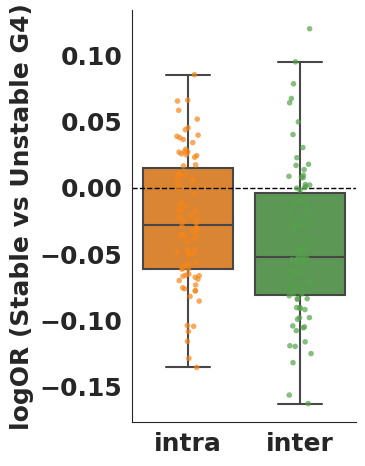

In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv("/home/alextu/scratch/confidence_intervals_fixed_segdups_results/final_results_G4_stable_vs_unstable_SegDup_FIXED_ONE_TABLE_CI.csv")

ORDER_SDTYPE = ["intra", "inter"]
HUE_PALETTE  = {"intra": "#F58518", "inter": "#54A24B"}

# Keep only intra / inter
df = df[df["sd_type"].isin(["intra", "inter"])].copy()

# Log-transform odds ratios
df = df[df["odds_ratio"] > 0]
df["ln_odds_ratio"] = np.log(df["odds_ratio"])

# =====================================
# PLOT SETTINGS
# =====================================
sns.set_style("white")
plt.rcParams.update({
    "font.size": 18,
    "font.weight": "bold",
    "axes.labelsize": 18,
    "axes.labelweight": "bold",
    "axes.titlesize": 18,
    "axes.titleweight": "bold",
    "xtick.labelsize": 18,
    "ytick.labelsize": 18
})

plt.figure(figsize=(4, 5))

# Boxplot
sns.boxplot(
    data=df,
    x="sd_type",
    y="ln_odds_ratio",
    order=ORDER_SDTYPE,
    hue="sd_type",
    palette=HUE_PALETTE,
    showfliers=False,
    linewidth=1.5,
    dodge=False
)

sns.stripplot(
    data=df,
    x="sd_type",
    y="ln_odds_ratio",
    order=ORDER_SDTYPE,
    hue="sd_type",
    palette=HUE_PALETTE,
    dodge=False,
    size=4,
    jitter=True,
    alpha=0.7
)

# Reference line: ln(OR) = 0 (OR = 1)
plt.axhline(0, linestyle="--", color="black", linewidth=1)

plt.xlabel("")
plt.ylabel("logOR (Stable vs Unstable G4)")

sns.despine()
plt.tight_layout()
plt.savefig("/home/alextu/projects/def-sushant/alextu/imgs_no_titles2/sd_G4_stability.pdf", dpi=300)
plt.show()

# IR Motif SD Enrichment

In [42]:
#!/usr/bin/env python3
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# ============ CONFIG ============
IN_CSV  = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/segdup_analysis/fixed_SDs/final_results_IR_stable_vs_unstable_SegDup_FIXED.csv"
OUT_DIR = "/home/alextu/projects/def-sushant/alextu/imgs_no_titles2"
os.makedirs(OUT_DIR, exist_ok=True)

ORDER_STRUCT  = ["IR_stable", "IR_unstable"]
ORDER_SDTYPE  = ["intra", "inter"]
PALETTE       = {"IR_stable": "#1f77b4", "IR_unstable": "#ff7f0e"}
HUE_PALETTE   = {"intra": "#F58518", "inter": "#54A24B"}

# ============ LOAD & FILTER ============
df = pd.read_csv(IN_CSV)

# keep only IR rows
df = df[df["structure"].isin(["IR_stable", "IR_unstable"])].copy()

# ============ PER-SD-TYPE PLOTS (with stats) ============
present_sdtypes = [s for s in ORDER_SDTYPE if s in df["sd_type"].unique()]

for sd in present_sdtypes:
    sub = df[df["sd_type"] == sd].copy()
    if sub.empty:
        continue

    stable   = sub.loc[sub["structure"] == "IR_stable", "odds_ratio"].dropna()
    unstable = sub.loc[sub["structure"] == "IR_unstable", "odds_ratio"].dropna()

    p_text = "n/a"
    if len(stable) > 0 and len(unstable) > 0:
        stat, pval = mannwhitneyu(stable, unstable, alternative="two-sided")
        p_text = f"p = {pval:.2e}"
    else:
        pval = None

    plt.figure(figsize=(7,5))
    sns.boxplot(data=sub, x="structure", y="odds_ratio",
                order=ORDER_STRUCT, hue="structure", palette=PALETTE,
                fliersize=0.5, linewidth=1.2, legend=False)
    sns.stripplot(data=sub, x="structure", y="odds_ratio",
                  order=ORDER_STRUCT, color="black", size=3,
                  alpha=0.6, jitter=True)

    plt.axhline(1, color="gray", linestyle="--", linewidth=1)
    plt.xlabel("")
    plt.xticks(fontsize=12, fontweight="bold")
    plt.yticks(fontsize=12, fontweight="bold")
    plt.ylabel("Odds Ratio", fontsize=12, fontweight="bold")
    plt.title(f"IR Stable vs Unstable in Fixed SDs ({sd})",
              fontsize=13, fontweight="bold")
    sns.despine()

    ymax = sub["odds_ratio"].max() if not sub["odds_ratio"].empty else 1.0
    x1, x2 = 0, 1
    plt.plot([x1, x1, x2, x2], [ymax*1.05, ymax*1.10, ymax*1.10, ymax*1.05],
             lw=1.2, c="black")
    plt.text((x1+x2)/2, ymax*1.11, p_text,
             ha="center", va="bottom",
             fontsize=12, fontweight="bold")

    out_path = os.path.join(OUT_DIR, f"ir_stable_unstable_segdup_{sd}.pdf")
    plt.tight_layout()
    plt.savefig(out_path, dpi=300)
    plt.close()
    print(f"[saved] {out_path}")

# ============ OVERALL GROUPED BOXPLOT (with per-sd_type stats aligned) ============
df_grouped = df[df["sd_type"].isin(present_sdtypes)].copy()

plt.figure(figsize=(5,5))
ax = sns.boxplot(
    data=df_grouped, x="structure", y="odds_ratio",
    order=ORDER_STRUCT, hue="sd_type",
    palette=HUE_PALETTE, fliersize=0.5, linewidth=1.2
)
sns.stripplot(
    data=df_grouped, x="structure", y="odds_ratio",
    order=ORDER_STRUCT, hue="sd_type",
    dodge=True, color="black", size=2.2, alpha=0.4
)

handles, labels = ax.get_legend_handles_labels()
uniq = dict(zip(labels[:len(present_sdtypes)], handles[:len(present_sdtypes)]))
ax.legend(uniq.values(), uniq.keys(), title="SD type", frameon=False)

plt.axhline(1, color="gray", linestyle="--", linewidth=1)
plt.xlabel("")
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.ylabel("Odds Ratio", fontsize=12, fontweight="bold")
sns.despine()

# ---- compute stats per sd_type (stable vs. unstable) and annotate ----
def p_to_stars(p):
    if p < 1e-4: return "****"
    if p < 1e-3: return "***"
    if p < 1e-2: return "**"
    if p < 5e-2: return "*"
    return "ns"

ymax_all = df_grouped["odds_ratio"].max() if not df_grouped.empty else 1.0
y_base   = ymax_all * 1.03
y_step   = max(0.06 * ymax_all, 0.05)
bar_h    = max(0.03 * ymax_all, 0.03)

x1, x2 = 0, 1
offsets = {"intra": -0.18, "inter": 0.18}
y_adjust = {"intra": 0.97, "inter": 1.0}  # intra slightly lower

for i, sd in enumerate(present_sdtypes):
    sub = df_grouped[df_grouped["sd_type"] == sd]
    stable   = sub.loc[sub["structure"] == "IR_stable", "odds_ratio"].dropna()
    unstable = sub.loc[sub["structure"] == "IR_unstable", "odds_ratio"].dropna()
    if len(stable) == 0 or len(unstable) == 0:
        continue

    stat, pval = mannwhitneyu(stable, unstable, alternative="two-sided")
    stars = p_to_stars(pval)

    x_offset = offsets.get(sd, 0)
    y_scale  = y_adjust.get(sd, 1.0)
    y = (y_base + i * (y_step + bar_h)) * y_scale

    x1_shift = x1 + x_offset
    x2_shift = x2 + x_offset

    ax.plot([x1_shift, x1_shift, x2_shift, x2_shift],
            [y, y + bar_h, y + bar_h, y],
            lw=1.2, c="black")

    ax.text((x1_shift + x2_shift) / 2, y + bar_h * 1.05,
            stars,
            ha="center", va="bottom", fontsize=11, fontweight="bold")

out_path = os.path.join(OUT_DIR, "ir_stable_unstable_segdup_GROUPED.pdf")
plt.tight_layout()
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"[saved] {out_path}")

[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/ir_stable_unstable_segdup_intra.pdf
[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/ir_stable_unstable_segdup_inter.pdf
[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/ir_stable_unstable_segdup_GROUPED.pdf


/tmp/ipykernel_3699712/1589501470.py:82: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


In [6]:
#!/usr/bin/env python3
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ====== CONFIG ======
ENRICH_CSV   = "/home/alextu/scratch/final_results_IR_stable_vs_unstable_SegDup_FIXED.csv"  # must have: sample_hap (or sample), structure, odds_ratio, sd_type
ANCESTRY_CSV = "/home/alextu/scratch/igsr_samples.tsv"
OUT_DIR      = "/home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles"
ORDER_STRUCT = ["IR_stable", "IR_unstable"]
ORDER_SDTYPE = ["all", "intra", "inter"]  # auto-subset to those present

os.makedirs(OUT_DIR, exist_ok=True)

# ====== LOAD ENRICHMENT ======
df = pd.read_csv(ENRICH_CSV)

# keep only IR rows
df = df[df["structure"].isin(ORDER_STRUCT)].copy()

# extract sample root for ancestry merge
if "sample_hap" in df.columns:
    sample_series = df["sample_hap"]
elif "sample" in df.columns:
    sample_series = df["sample"]
else:
    raise ValueError("Need 'sample_hap' or 'sample' to join ancestry.")

df["Sample name"] = sample_series.astype(str).str.extract(r"^([A-Z]{2}\d{5})", expand=False)

need = {"structure","odds_ratio","sd_type","Sample name"}
missing = need - set(df.columns)
if missing:
    raise ValueError(f"CSV missing columns: {missing}")

df = df.dropna(subset=list(need))
df = df[df["odds_ratio"] > 0]

# ====== LOAD ANCESTRY (robust) ======
anc = pd.read_csv(ANCESTRY_CSV, sep=None, engine="python")
anc = anc.rename(columns={c: c.strip().lower().replace(" ", "_") for c in anc.columns})

name_col = next((c for c in anc.columns if c in {"sample_name","sample","sample_name_id"}), None)
sp_name  = next((c for c in anc.columns if c in {"superpopulation_name","superpopulation"}), None)
sp_code  = next((c for c in anc.columns if c in {"superpopulation_code","superpop_code","superpop"}), None)

if name_col is None:
    raise ValueError("Ancestry file needs a sample name column.")
if sp_name is None and sp_code is None:
    raise ValueError("Ancestry file needs a superpopulation name or code.")

keep = [name_col] + ([sp_name] if sp_name else []) + ([sp_code] if sp_code else [])
anc = anc[keep].drop_duplicates()
anc["Ancestry"] = anc[sp_name] if sp_name else anc[sp_code]
anc = anc.rename(columns={name_col: "Sample name"})

# Optional mapping codes -> readable names
code_to_name = {"AFR":"African Ancestry","AMR":"American Ancestry","EAS":"East Asian Ancestry",
                "EUR":"European Ancestry","SAS":"South Asian Ancestry"}
anc["Ancestry"] = anc["Ancestry"].replace(code_to_name)

# ====== MERGE ======
df = df.merge(anc[["Sample name","Ancestry"]], on="Sample name", how="left").dropna(subset=["Ancestry"])

# ====== PALETTES ======
anc_default = {
    "African Ancestry": "#1f77b4",
    "American Ancestry": "#ff7f0e",
    "East Asian Ancestry": "#2ca02c",
    "European Ancestry": "#9467bd",
    "South Asian Ancestry": "#d62728",
}
def build_anc_palette(series):
    uniq = series.astype(str).unique().tolist()
    pal = {}
    tab10 = sns.color_palette("tab10", n_colors=max(10, len(uniq)))
    for i, a in enumerate(uniq):
        pal[a] = anc_default.get(a, tab10[i % len(tab10)])
    return pal

# ====== PLOT ONE FIGURE PER SD TYPE ======
present_sdtypes = [s for s in ORDER_SDTYPE if s in df["sd_type"].unique()]
for sd in present_sdtypes:
    sub = df[df["sd_type"] == sd].copy()
    if sub.empty:
        continue

    anc_palette = build_anc_palette(sub["Ancestry"])

    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(
        data=sub, x="structure", y="odds_ratio",
        order=ORDER_STRUCT, hue="Ancestry", palette=anc_palette,
        fliersize=0.5, linewidth=1.2
    )
    sns.stripplot(
        data=sub, x="structure", y="odds_ratio",
        order=ORDER_STRUCT, hue="Ancestry", dodge=True,
        color="black", size=2.5, alpha=0.35
    )

    # clean doubled legend (from box + strip)
    handles, labels = ax.get_legend_handles_labels()
    n = sub["Ancestry"].nunique()
    ax.legend(handles[:n], labels[:n], title="Ancestry",
              bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

    plt.axhline(1, color="gray", linestyle="--", linewidth=1)
    plt.xlabel("")
    plt.xticks(fontsize=12, fontweight="bold")
    plt.yticks(fontsize=12, fontweight="bold")
    plt.ylabel("Odds Ratio", fontsize=12, fontweight="bold")
    plt.title(f"IR Stable vs Unstable in Fixed SDs by Ancestry ({sd})",
              fontsize=13, fontweight="bold")
    sns.despine()
    plt.tight_layout()

    out_pdf = os.path.join(OUT_DIR, f"stable_unstable_ir_segdup_by_ancestry_{sd}.pdf")
    plt.savefig(out_pdf, dpi=300)
    plt.close()
    print(f"[saved] {out_pdf}")

/tmp/ipykernel_1248497/3555139248.py:98: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(
/tmp/ipykernel_1248497/3555139248.py:98: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


[saved] /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/stable_unstable_ir_segdup_by_ancestry_all.pdf
[saved] /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/stable_unstable_ir_segdup_by_ancestry_intra.pdf
[saved] /home/alextu/projects/def-sushant/alextu/PhasedHapAssembly-nonB/imgs_no_titles/stable_unstable_ir_segdup_by_ancestry_inter.pdf


/tmp/ipykernel_1248497/3555139248.py:98: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


In [3]:
#!/usr/bin/env python3
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import numpy as np

# ============ CONFIG ============
IN_CSV  = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/segdup_analysis/fixed_SDs/final_results_IR_stable_vs_unstable_SegDup_FIXED.csv"
OUT_DIR = "/home/alextu/projects/def-sushant/alextu/imgs_no_titles2"
os.makedirs(OUT_DIR, exist_ok=True)

ORDER_STRUCT  = ["IR_stable", "IR_unstable"]
ORDER_SDTYPE  = ["intra", "inter"]
PALETTE       = {"IR_stable": "#1f77b4", "IR_unstable": "#ff7f0e"}
HUE_PALETTE   = {"intra": "#F58518", "inter": "#54A24B"}

# ============ LOAD & FILTER ============
df = pd.read_csv(IN_CSV)
df = df[df["structure"].isin(["IR_stable", "IR_unstable"])].copy()
df = df[df["odds_ratio"] > 0].copy()
df["log_or"] = np.log(df["odds_ratio"])

# ============ PER-SD-TYPE PLOTS (with stats) ============
present_sdtypes = [s for s in ORDER_SDTYPE if s in df["sd_type"].unique()]

for sd in present_sdtypes:
    sub = df[df["sd_type"] == sd].copy()
    if sub.empty:
        continue

    stable   = sub.loc[sub["structure"] == "IR_stable", "log_or"].dropna()
    unstable = sub.loc[sub["structure"] == "IR_unstable", "log_or"].dropna()

    p_text = "n/a"
    if len(stable) > 0 and len(unstable) > 0:
        stat, pval = mannwhitneyu(stable, unstable, alternative="two-sided")
        p_text = f"p = {pval:.2e}"
    else:
        pval = None

    plt.figure(figsize=(7,5))
    sns.boxplot(
        data=sub, x="structure", y="log_or",
        order=ORDER_STRUCT, hue="structure", palette=PALETTE,
        fliersize=0.5, linewidth=1.2, legend=False
    )
    sns.stripplot(
        data=sub, x="structure", y="log_or",
        order=ORDER_STRUCT, color="black", size=3,
        alpha=0.6, jitter=True
    )

    plt.axhline(0, color="gray", linestyle="--", linewidth=1)
    plt.xlabel("")
    plt.xticks(fontsize=12, fontweight="bold")
    plt.yticks(fontsize=12, fontweight="bold")
    plt.ylabel("log(Odds Ratio)", fontsize=12, fontweight="bold")
    plt.title(f"IR Stable vs Unstable in Fixed SDs ({sd})",
              fontsize=13, fontweight="bold")
    sns.despine()

    ymax = sub["log_or"].max() if not sub["log_or"].empty else 0.0
    x1, x2 = 0, 1
    plt.plot([x1, x1, x2, x2], [ymax + 0.05, ymax + 0.10, ymax + 0.10, ymax + 0.05],
             lw=1.2, c="black")
    plt.text((x1+x2)/2, ymax + 0.11, p_text,
             ha="center", va="bottom",
             fontsize=12, fontweight="bold")

    out_path = os.path.join(OUT_DIR, f"ir_stable_unstable_segdup_{sd}.pdf")
    plt.tight_layout()
    plt.savefig(out_path, dpi=300)
    plt.close()
    print(f"[saved] {out_path}")

# ============ OVERALL GROUPED BOXPLOT (with per-sd_type stats aligned) ============
df_grouped = df[df["sd_type"].isin(present_sdtypes)].copy()

plt.figure(figsize=(6,6))
ax = sns.boxplot(
    data=df_grouped, x="structure", y="log_or",
    order=ORDER_STRUCT, hue="sd_type",
    palette=HUE_PALETTE, fliersize=0.5, linewidth=1.2
)
sns.stripplot(
    data=df_grouped, x="structure", y="log_or",
    order=ORDER_STRUCT, hue="sd_type",
    dodge=True, color="black", size=2.2, alpha=0.4
)

handles, labels = ax.get_legend_handles_labels()
uniq = dict(zip(labels[:len(present_sdtypes)], handles[:len(present_sdtypes)]))

leg = ax.legend(
    uniq.values(),
    uniq.keys(),
    title="SD type",
    frameon=False,
    fontsize=16
)

leg.get_title().set_fontsize(16)
leg.get_title().set_fontweight("bold")

for text in leg.get_texts():
    text.set_fontweight("bold")

plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.xlabel("")
plt.xticks(fontsize=16, fontweight="bold")
plt.yticks(fontsize=16, fontweight="bold")
plt.ylabel("log(Odds Ratio)", fontsize=16, fontweight="bold")
sns.despine()

def p_to_stars(p):
    if p < 1e-4: return "****"
    if p < 1e-3: return "***"
    if p < 1e-2: return "**"
    if p < 5e-2: return "*"
    return "ns"

ymax_all = df_grouped["log_or"].max() if not df_grouped.empty else 0.0
y_base   = ymax_all + 0.05
y_step   = max(0.06 * (abs(ymax_all) + 1.0), 0.05)
bar_h    = max(0.03 * (abs(ymax_all) + 1.0), 0.03)

x1, x2 = 0, 1
offsets = {"intra": -0.18, "inter": 0.18}
y_adjust = {"intra": 0.97, "inter": 1.0}

for i, sd in enumerate(present_sdtypes):
    sub = df_grouped[df_grouped["sd_type"] == sd]
    stable   = sub.loc[sub["structure"] == "IR_stable", "log_or"].dropna()
    unstable = sub.loc[sub["structure"] == "IR_unstable", "log_or"].dropna()
    if len(stable) == 0 or len(unstable) == 0:
        continue

    stat, pval = mannwhitneyu(stable, unstable, alternative="two-sided")
    stars = p_to_stars(pval)

    x_offset = offsets.get(sd, 0)
    y_scale  = y_adjust.get(sd, 1.0)
    y = (y_base + i * (y_step + bar_h)) * y_scale

    x1_shift = x1 + x_offset
    x2_shift = x2 + x_offset

    ax.plot([x1_shift, x1_shift, x2_shift, x2_shift],
            [y, y + bar_h, y + bar_h, y],
            lw=1.2, c="black")

    ax.text((x1_shift + x2_shift) / 2, y + bar_h * 1.05,
            stars,
            ha="center", va="bottom", fontsize=16, fontweight="bold")

out_path = os.path.join(OUT_DIR, "ir_stable_unstable_segdup_GROUPED.pdf")
plt.tight_layout()
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"[saved] {out_path}")

[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/ir_stable_unstable_segdup_intra.pdf
[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/ir_stable_unstable_segdup_inter.pdf
[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/ir_stable_unstable_segdup_GROUPED.pdf


/tmp/ipykernel_727647/1148807048.py:87: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


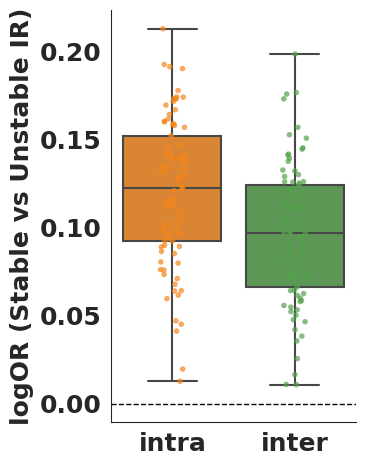

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================
# LOAD DATA
# =====================================
df = pd.read_csv("/home/alextu/scratch/confidence_intervals_fixed_segdups_results/final_results_IR_stable_vs_unstable_SegDup_FIXED_ONE_TABLE_CI.csv")  # update path if needed

ORDER_SDTYPE = ["intra", "inter"]
HUE_PALETTE  = {"intra": "#F58518", "inter": "#54A24B"}

# Keep only intra / inter SDs
df = df[df["sd_type"].isin(["intra", "inter"])].copy()

# Log-transform odds ratios
df = df[df["odds_ratio"] > 0]
df["ln_odds_ratio"] = np.log(df["odds_ratio"])

# =====================================
# PLOT SETTINGS
# =====================================
sns.set_style("white")
plt.rcParams.update({
    "font.size": 18,
    "font.weight": "bold",
    "axes.labelsize": 18,
    "axes.labelweight": "bold",
    "axes.titlesize": 18,
    "axes.titleweight": "bold",
    "xtick.labelsize": 18,
    "ytick.labelsize": 18
})

plt.figure(figsize=(4, 5))

# Boxplot
sns.boxplot(
    data=df,
    x="sd_type",
    y="ln_odds_ratio",
    order=ORDER_SDTYPE,
    hue="sd_type",
    palette=HUE_PALETTE,
    showfliers=False,
    linewidth=1.5,
    dodge=False
)

sns.stripplot(
    data=df,
    x="sd_type",
    y="ln_odds_ratio",
    order=ORDER_SDTYPE,
    hue="sd_type",
    palette=HUE_PALETTE,
    dodge=False,
    size=4,
    jitter=True,
    alpha=0.7
)

# Reference line: ln(OR) = 0 (OR = 1)
plt.axhline(0, linestyle="--", color="black", linewidth=1)

plt.xlabel("")
plt.ylabel("logOR (Stable vs Unstable IR)")

sns.despine()
plt.tight_layout()
plt.savefig("/home/alextu/projects/def-sushant/alextu/imgs_no_titles2/sd_IR_stability.pdf", dpi=300)
plt.show()